# Chapter 1

## Problem 7

Consider the quadratic equation $ax^2 + bx + c = 0$. 
The number of roots of this equation will be 2 by Fundamental Theorem of Algebra.
Let those roots be $\alpha$ and $\beta$.

So, this equation can be represented in terms of its factors based on Factor Theorem for Polynomials.

Hence, $ax^2 + bx + c = p(x - \alpha)(x - \beta)$.

Expanding RHS,

$ax^2 + bx + c = px^2 - p(\alpha + \beta)x + p\alpha\beta$.

Now comparing the coefficients on both sides,

Coefficient of $x^2, a = p$.

Coefficient of $x^1, b = - p(\alpha + \beta)$.

Coefficient of $x^0, c = p(\alpha\beta).$

So, product of roots = $\alpha\beta = c/p = c/a$.

$QED.$

## Problem 10

In [32]:
function eratosthenes(n::Int)
    isprime = ones(Bool, n)
    isprime[1] = false
    for i = 2:round(Int, sqrt(n))
        if isprime[i]
            for j = i^2:i:n
                isprime[j] = false
            end
        end
    end
    return filter(x -> isprime[x], 1:n)
end

eratosthenes (generic function with 1 method)

In [33]:
function countPrimeList(n::Int)
    primes = eratosthenes(n)
    primecount = zeros(Int, n)
    primecount[1] = 0
    j = 1
    for i = 2:n
        primecount[i]=primecount[i-1]
        if j<=length(primes) && primes[j] == i
            j=j+1
            primecount[i]=primecount[i]+1
        end
    end
    return primecount
end

countPrimeList (generic function with 1 method)

In [34]:
function primeDist(n::Int)
    primecount = countPrimeList(n)
    primedistlist = zeros(BigFloat, n)
    primedistlist[1] = 0
    for i = 2:n
        primedistlist[i] = (primecount[i]*log(1.0 * i))/(1.0 * i)
    end
    return primedistlist
end

primeDist (generic function with 1 method)


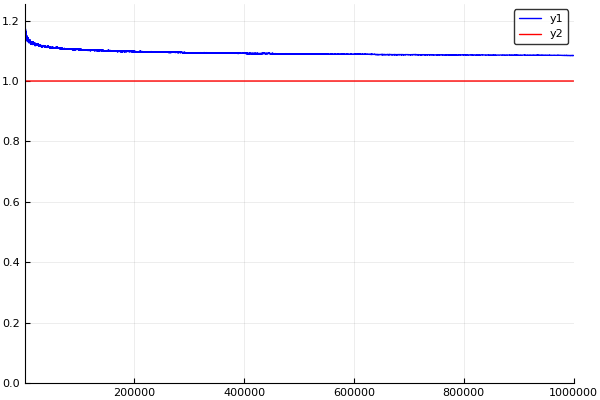

In [35]:
using Plots
x = 1:1000000
z = ones(Int, 1000000)
plot(primeDist(1000000), color="blue")
plot!(x,z, color="red")

In the above graph, $y1 = \frac{\pi(n)ln(n)}{n}$ and $y2=1$. The convergence is very slow as evident from graph.

# Chapter 2
## Problem 4

In [8]:
function closest{T<:Number}(a::Vector{T}, c::T)
    n = length(a)
    i = 1
    j = n
    s = (a[1],a[n])
    past = a[1] + a[n]
    while (i<=j)
        curr = a[i]+a[j]
        if(abs(c - curr) < abs(c - past))
            past = curr
            s = (a[i], a[j])
        end    
        if(curr<c)
            i=i+1
        elseif(curr>c)
            j=j-1
        else
            s=(a[i],a[j])
            break
        end    
    end
    return s
end

closest (generic function with 2 methods)

In [15]:
closest([1,2,3,4,5,6,7], 6)

(1, 5)

# Problem 5

In [1]:
function merge(a::Vector, b::Vector)
    an = length(a)
    bn = length(b)
    i = 1
    j = 1
    c = []
    while (i<=an && j<=bn)
        if(a[i]<=b[j])
            push!(c,a[i])
            i=i+1
        else
            push!(c,b[j])
            j=j+1
        end    
    end
    while (i<=an)
        push!(c,a[i])
        i=i+1
    end
    while (j<=bn)
        push!(c,b[j])
        j=j+1
    end
    return c
end

merge (generic function with 1 method)

In [16]:
merge([1,2,3,5,7],[1,3,4])

8-element Array{Any,1}:
 1
 1
 2
 3
 3
 4
 5
 7

# Error in the book

## Incomplete Problem Statement

Consider the problem number 6 from Chapter 2.

Two entries $x_i$ and $x_j$ of a numerical sequence $x = (x_1, . . . , x_n)$ represent
an inversion if $x_i > x_j$ . Write an efficient Julia function to count the
number of inversions in x.

The problem missed the condition on i and j, i.e. 
Two entries $x_i$ and $x_j$ of a numerical sequence $x = (x_1, . . . , x_n)$ represent
an inversion if $x_i > x_j$, when $i < j$.